<a href="https://colab.research.google.com/github/JinHeeeKang/Playdata_Python/blob/master/0903.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
#!pip install mglearn
import mglearn
from sklearn.datasets import  load_wine

cancer =load_breast_cancer()
col_names = cancer.feature_names
print(len(col_names))
X_Data=pd.DataFrame(cancer.data,columns=col_names)
y=pd.DataFrame(cancer.target)

X_train,X_test,y_train,y_test =train_test_split(
    cancer.data,cancer.target,random_state=0)


30


In [ ]:
#AdaBoosting
#잘못 분류된걸 업데이트 하면서
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100,random_state=42)
#n_estimators:트리갯수 #100번 결과값을 업데이트 할 것이다
X_train = pd.DataFrame(X_train, columns=cancer.feature_names)
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=42)

In [ ]:
#fit 하고나면 정확도를 확인해보기
print("훈련세트 정확도:{:.3f}".format(ada.score(X_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(ada.score(X_test,y_test)))


훈련세트 정확도:1.000
테스트 세트 정확도:0.986


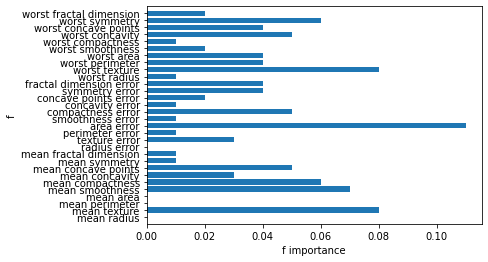

In [ ]:
#f importance이 높은게 좋은것
n_features=cancer.data.shape[1]

plt.barh(range(n_features),ada.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel("f importance")
plt.ylabel("f")
plt.ylim(-1,n_features)
plt.show()

In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbrt=GradientBoostingClassifier(random_state=0)#defalt depth =3
X_train = pd.DataFrame(X_train, columns=cancer.feature_names)
gbrt.fit(X_train,y_train)

print("훈련세트 정확도:{:.3f}".format(ada.score(X_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(ada.score(X_test,y_test)))

훈련세트 정확도:1.000
테스트 세트 정확도:0.986


In [ ]:
gbrt=GradientBoostingClassifier(random_state=0,max_depth=2)
gbrt.fit(X_train,y_train)

print("훈련세트 정확도:{:.3f}".format(ada.score(X_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(ada.score(X_test,y_test)))

훈련세트 정확도:1.000
테스트 세트 정확도:0.986


In [ ]:
gbrt=GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

print("훈련세트 정확도:{:.3f}".format(ada.score(X_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(ada.score(X_test,y_test)))

훈련세트 정확도:1.000
테스트 세트 정확도:0.986


In [ ]:
gbrt=GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)

print("훈련세트 정확도:{:.3f}".format(ada.score(X_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(ada.score(X_test,y_test)))

훈련세트 정확도:1.000
테스트 세트 정확도:0.986


In [ ]:
lr_list=[0.05,0.075,0.1,0.25,0.5,0.75,1]#1은 잘 안씀

for learning_rate in lr_list:
    gb_clf=GradientBoostingClassifier(n_estimators=50,
                                      learning_rate=learning_rate,
                                      max_depth=2,random_state=0)
    gb_clf.fit(X_train,y_train)

    print("Learning rate:",learning_rate)
    print("Accuracy score(training): {0:.3f}".format(gb_clf.score(X_train,y_train)))
    print("Accuracy score(validation): {0:.3f}".format(gb_clf.score(X_test,y_test)))


Learning rate: 0.05
Accuracy score(training): 0.984
Accuracy score(validation): 0.958
Learning rate: 0.075
Accuracy score(training): 0.993
Accuracy score(validation): 0.958
Learning rate: 0.1
Accuracy score(training): 0.995
Accuracy score(validation): 0.958
Learning rate: 0.25
Accuracy score(training): 1.000
Accuracy score(validation): 0.979
Learning rate: 0.5
Accuracy score(training): 1.000
Accuracy score(validation): 0.972
Learning rate: 0.75
Accuracy score(training): 1.000
Accuracy score(validation): 0.965
Learning rate: 1
Accuracy score(training): 1.000
Accuracy score(validation): 0.944


In [ ]:
from sklearn.metrics import classification_report
gb_clf2=GradientBoostingClassifier(n_estimators=50,
                                      learning_rate=0.25,
                                      max_depth=2,random_state=0)
X_train = pd.DataFrame(X_train, columns=cancer.feature_names)
gb_clf2.fit(X_train,y_train)
predictions=gb_clf2.predict(X_test)
#전체를 판단할때는 avg값으로 하는게 좋음
print("Classification Report")
print(classification_report(y_test,predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.98      0.99      0.98        90

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



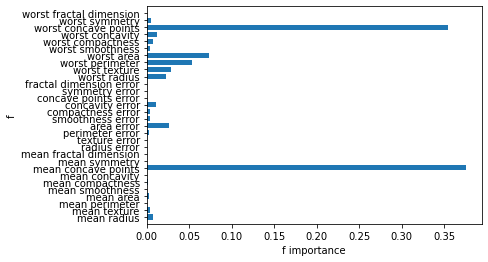

In [ ]:
n_features=cancer.data.shape[1]
#이름 매치XX - 이따 돌려보기
plt.barh(range(n_features),gb_clf2.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel("f importance")
plt.ylabel("f")
plt.ylim(-1,n_features)
plt.show()

In [ ]:
wine =load_wine()
col_names = wine.feature_names
print(len(col_names))
X_Data=pd.DataFrame(wine.data,columns=col_names)
y=pd.DataFrame(wine.target)

X_train,X_test,y_train,y_test =train_test_split(
    wine.data,wine.target,test_size=0.3,random_state=0)


13


In [ ]:

from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100,random_state=42)

ada.fit(X_train,y_train)


In [ ]:
#이어서 계속치기

In [ ]:
#xgboost
from xgboost import plot_importance
from xgboost import XGBClassifier
import xgboost as xgb

In [ ]:
clf=XGBClassifier()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

cancer =load_breast_cancer()
col_names = cancer.feature_names
print(len(col_names))
X_Data=pd.DataFrame(cancer.data,columns=col_names)
y=pd.DataFrame(cancer.target)

X_train,X_test,y_train,y_test =train_test_split(
    cancer.data,cancer.target,random_state=0)


30


In [ ]:
xgbb=XGBClassifier(n_estimators=500,learning_rate=0.01,
                    max_depth=5,random_state=0)
xgbb.fit(X_train,y_train)

print("훈련세트 정확도:{:.3f}".format(xgbb.score(X_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(xgbb.score(X_test,y_test)))

훈련세트 정확도:1.000
테스트 세트 정확도:0.986


In [ ]:
#이거 XXXX
plot_importance(xgbb)
plt.yticks(range(len(col_names)),col_names)
plt.show()

mean perimeter             0.000000
mean fractal dimension     0.001348
mean compactness           0.003409
worst fractal dimension    0.004356
mean concavity             0.004462
worst compactness          0.004719
worst symmetry             0.005157
smoothness error           0.005919
mean radius                0.006442
concave points error       0.006886
symmetry error             0.007753
worst smoothness           0.007974
texture error              0.008438
compactness error          0.009900
concavity error            0.010351
mean smoothness            0.011029
area error                 0.011221
mean symmetry              0.012301
mean area                  0.014500
perimeter error            0.014916
fractal dimension error    0.015012
radius error               0.019017
worst texture              0.021520
mean texture               0.021834
worst concavity            0.024431
worst radius               0.036750
worst area                 0.037053
worst concave points       0

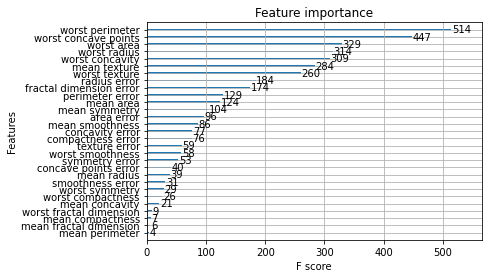

In [ ]:
import matplotlib.pyplot as plt

feature_imp =pd.Series(xgbb.feature_importances_, index=cancer.feature_names).sort_values(ascending=True)
feature_imp
print(feature_imp)
print(feature_imp.index)

plot_importance(xgbb).set_yticklabels(feature_imp.index)
plt.show()

In [ ]:
#xgBoosting
xg=XGBClassifier(random_state=0)
param_grid={
    'max_depth':[4,6,8,10,12],
    'n_estimators':[50,100],
    'learning_rate':[0.01,0.05,0.1,0.15]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gcv=GridSearchCV(xg,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=1)
gcv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15],
                         'max_depth': [4, 6, 8, 10, 12],
                         'n_estimators': [50, 100]},
   

In [ ]:
print('final parans',gcv.best_params_)
print('best score',gcv.best_score_)

final parans {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50}
best score 0.9436666666666665


In [ ]:
#wine데이터로 xgboosting
from sklearn.datasets import  load_wine

wine =load_wine()
col_names = wine.feature_names
print(len(col_names))
X_Data=pd.DataFrame(wine.data,columns=col_names)
y=pd.DataFrame(wine.target)

X_train,X_test,y_train,y_test =train_test_split(
    wine.data,wine.target,test_size=0.3,random_state=0)


13


In [ ]:
xgb_wine=XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3,objective='multi:softmax',random_state=42)
xgb_wine.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print("훈련세트 정확도:{:.3f}".format(xgb_wine.score(X_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(xgb_wine.score(X_test,y_test)))

In [ ]:
#xgBoosting
xg=XGBClassifier(random_state=0)
param_grid={
    'max_depth':[4,6,8,10,12],
    'n_estimators':[50,100],
    'learning_rate':[0.01,0.05,0.1,0.15]}

In [ ]:
xgbbb =XGBClassifier()
param_grid={
    'max_depth':[4,6,8,10,12],
    'n_estimators':[50,100],
    'learning_rate':[0.01,0.05,0.1,0.15]}
gcv=GridSearchCV(xgbbb,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=1)
gcv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15],
                         'max_depth': [4, 6, 8, 10, 12],
                         'n_estimators': [50, 100]},
   

In [ ]:
print('final parans',gcv.best_params_)
print('best score',gcv.best_score_)

final parans {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50}
best score 0.9436666666666665


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

In [ ]:
def get_eval(y_test,y_pred):
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred,average='macro')
    recall=recall_score(y_test,y_pred,average='macro')
    f_scro=f1_score(y_test,y_pred,average='macro')
    print('정확도:{:.4f}'.format(accuracy))
    print('정밀도:{:.4f}'.format(precision))
    print('재현율:{:.4f}'.format(recall))
    print('f_score:{:.4f}'.format(f_scro))


In [ ]:
#400번 돌리는 코드를 짰는데 280번째에 최적이라 그때 멈추고, 그때 제일 좋은 estimators값을 알려줌 -180
xgb_wine=XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3,objective='multi:softmax',random_state=42)
xgb_wine.fit(X_train,y_train,early_stopping_rounds=100,eval_metric="mlogloss",eval_set=[(X_test,y_test)],verbose=True)
ws100_preds=xgb_wine.predict(X_test)
get_eval(y_test,ws100_preds)

[0]	validation_0-mlogloss:0.97868
Will train until validation_0-mlogloss hasn't improved in 100 rounds.
[1]	validation_0-mlogloss:0.884696
[2]	validation_0-mlogloss:0.803847
[3]	validation_0-mlogloss:0.729879
[4]	validation_0-mlogloss:0.66679
[5]	validation_0-mlogloss:0.613629
[6]	validation_0-mlogloss:0.565266
[7]	validation_0-mlogloss:0.521635
[8]	validation_0-mlogloss:0.481281
[9]	validation_0-mlogloss:0.446401
[10]	validation_0-mlogloss:0.415522
[11]	validation_0-mlogloss:0.387958
[12]	validation_0-mlogloss:0.364007
[13]	validation_0-mlogloss:0.342541
[14]	validation_0-mlogloss:0.322741
[15]	validation_0-mlogloss:0.305223
[16]	validation_0-mlogloss:0.289273
[17]	validation_0-mlogloss:0.275719
[18]	validation_0-mlogloss:0.26347
[19]	validation_0-mlogloss:0.250706
[20]	validation_0-mlogloss:0.240992
[21]	validation_0-mlogloss:0.231796
[22]	validation_0-mlogloss:0.224526
[23]	validation_0-mlogloss:0.21675
[24]	validation_0-mlogloss:0.209522
[25]	validation_0-mlogloss:0.202891
[26]	val

In [ ]:
#boston 집값 예측 모델
from xgboost import XGBRegressor
from xgboost import  plot_importance

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error#더 예민? 함


In [ ]:
boston=load_boston()
X=boston.data
y=boston.target
col_names=boston.feature_names

In [ ]:
print(X.shape)
print(y.shape)
print(col_names)

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(354, 13)
(152, 13)


In [ ]:
model=XGBRegressor()#objective는 선언해주기 안그럼 warning
model.fit(X_train,y_train)

[07:37:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
model=XGBRegressor(objective='reg:squarederror')#objective 옵션 오차제곱
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred=model.predict(X_test)
y_true=y_test

In [ ]:
mse=mean_squared_error(y_true,y_pred)
mse # 극단적인 값이 나올수 있기때문에 gridsearch를 해주는 것

10.3359012606888

In [ ]:
#LightGBM : 대용량 데이터에서 강력

In [ ]:
cancer =load_breast_cancer()
col_names = cancer.feature_names
print(len(col_names))
X_Data=pd.DataFrame(cancer.data,columns=col_names)
y=pd.DataFrame(cancer.target)

X_train,X_test,y_train,y_test =train_test_split(
    cancer.data,cancer.target,random_state=0)


30


In [ ]:
from lightgbm import  LGBMClassifier,plot_importance
lgb=LGBMClassifier(n_estimators=500,random_state=42)
lgb.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
print("훈련세트 정확도:{:.3f}".format(lgb.score(X_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(lgb.score(X_test,y_test)))

훈련세트 정확도:1.000
테스트 세트 정확도:0.979


In [ ]:
lgb=LGBMClassifier(n_estimators=10,random_state=42)
lgb.fit(X_train,y_train)
print("훈련세트 정확도:{:.3f}".format(lgb.score(X_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(lgb.score(X_test,y_test)))

훈련세트 정확도:0.972
테스트 세트 정확도:0.958


In [ ]:
evals=[(X_test,y_test)]

In [ ]:
lgb.fit(X_train,y_train,early_stopping_rounds=100,eval_metric="logloss",eval_set=evals,verbose=True)
#eval_set :성능평가를 위한 평가용 데이터 셋 
#eval_metric :평가세트에 적용ㄹ할 성능 평가방법

[1]	valid_0's binary_logloss: 0.584425	valid_0's binary_logloss: 0.584425
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.522997	valid_0's binary_logloss: 0.522997
[3]	valid_0's binary_logloss: 0.476643	valid_0's binary_logloss: 0.476643
[4]	valid_0's binary_logloss: 0.433657	valid_0's binary_logloss: 0.433657
[5]	valid_0's binary_logloss: 0.397921	valid_0's binary_logloss: 0.397921
[6]	valid_0's binary_logloss: 0.366946	valid_0's binary_logloss: 0.366946
[7]	valid_0's binary_logloss: 0.334532	valid_0's binary_logloss: 0.334532
[8]	valid_0's binary_logloss: 0.312633	valid_0's binary_logloss: 0.312633
[9]	valid_0's binary_logloss: 0.28787	valid_0's binary_logloss: 0.28787
[10]	valid_0's binary_logloss: 0.26702	valid_0's binary_logloss: 0.26702
[11]	valid_0's binary_logloss: 0.249738	valid_0's binary_logloss: 0.249738
[12]	valid_0's binary_logloss: 0.23343	valid_0's binary_logloss: 0.23343
[13]	valid_0's binary_logloss: 0.221714	valid_0's bi

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

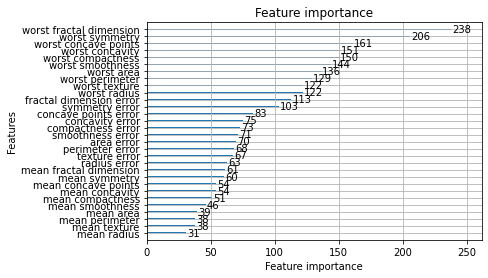

In [ ]:
plot_importance(lgb)
plt.yticks(range(len(col_names)),col_names)
plt.show()

In [ ]:
lb =LGBMClassifier()
param_grid={
    'max_depth':[4,6,8,10,12],
    'n_estimators':[50,100],
    'learning_rate':[0.01,0.05,0.1,0.15]}
lgb=GridSearchCV(lb,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=1)
lgb.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15],
                         'max_

In [ ]:
print('final params',lgb.best_params_)
print('best score',lgb.best_score_)

final params {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
best score 0.9741997264021889


In [ ]:
cv_result_df=pd.DataFrame(lgb_cv)